In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import copy
import numpy as np
import json

load th json metadata for dataset

In [35]:
# the base directory of the dataset
root_dir = os.path.expanduser("~/Projects/data/imagenet_vid_ytbb_robust/imagenet-vid-robust")

# get the anchor file dictionary
with open(os.path.join(root_dir,"metadata","pmsets.json")) as pmsets:
    pmsets_dict = json.load(pmsets)

# get the label file dictionary
with open(os.path.join(root_dir,"metadata","labels.json")) as labels:
    labels_dict = json.load(labels)

# get the class idx to wordnet mapping dictionary
with open(os.path.join(root_dir,"misc","imagenet_vid_class_index.json")) as imagenet_vid_class_index:
    imagenet_vid_class_index_dict = json.load(imagenet_vid_class_index)  
    imagenet_vid_wnid_map_dict = {}
    for k,v in zip(imagenet_vid_class_index_dict.keys(),imagenet_vid_class_index_dict.values()):
        imagenet_vid_wnid_map_dict[v[0]] = [k,v[1]] 

# get the child to parent wornet id mapping dictionary
with open(os.path.join(root_dir,"misc","wnid_map.json")) as wnid_map:
    wnid_map_dict = json.load(wnid_map)

# get the idx to imagenet wornet id mapping dictionary
with open(os.path.join(root_dir,"misc","imagenet_class_index.json")) as imagenet_class_index:
    imagenet_class_index_dict = json.load(imagenet_class_index)  

In [ ]:
imgnet_wnid = imagenet_class_index_dict["370"][0]
imgnetvid_wnid = wnid_map_dict[imgnet_wnid]
imagenet_vid_wnid_map_dict[imgnetvid_wnid]

get videos with a single class

In [ ]:
c = 0
for key in pmsets_dict.keys():
    if len(labels_dict[key]) == 1:
        c += 1
print(c)

In [37]:
pmsets_dict.keys()

dict_keys(['val/ILSVRC2015_val_00000000/000442.JPEG', 'val/ILSVRC2015_val_00000001/000207.JPEG', 'val/ILSVRC2015_val_00000002/000398.JPEG', 'val/ILSVRC2015_val_00000003/000237.JPEG', 'val/ILSVRC2015_val_00000004/000440.JPEG', 'val/ILSVRC2015_val_00000005/000030.JPEG', 'val/ILSVRC2015_val_00001000/000142.JPEG', 'val/ILSVRC2015_val_00003000/000134.JPEG', 'val/ILSVRC2015_val_00003001/000217.JPEG', 'val/ILSVRC2015_val_00004000/000087.JPEG', 'val/ILSVRC2015_val_00005000/000071.JPEG', 'val/ILSVRC2015_val_00005001/000071.JPEG', 'val/ILSVRC2015_val_00005002/000101.JPEG', 'val/ILSVRC2015_val_00005003/000121.JPEG', 'val/ILSVRC2015_val_00006000/000042.JPEG', 'val/ILSVRC2015_val_00006001/000027.JPEG', 'val/ILSVRC2015_val_00006002/000028.JPEG', 'val/ILSVRC2015_val_00006003/000018.JPEG', 'val/ILSVRC2015_val_00006004/000016.JPEG', 'val/ILSVRC2015_val_00006005/000089.JPEG', 'val/ILSVRC2015_val_00007000/000042.JPEG', 'val/ILSVRC2015_val_00007001/000047.JPEG', 'val/ILSVRC2015_val_00007002/000049.JPEG', 

In [40]:
k = next(iter(pmsets_dict.keys()))
pmsets_dict[k]

['val/ILSVRC2015_val_00000000/000432.JPEG',
 'val/ILSVRC2015_val_00000000/000433.JPEG',
 'val/ILSVRC2015_val_00000000/000434.JPEG',
 'val/ILSVRC2015_val_00000000/000435.JPEG',
 'val/ILSVRC2015_val_00000000/000436.JPEG',
 'val/ILSVRC2015_val_00000000/000437.JPEG',
 'val/ILSVRC2015_val_00000000/000438.JPEG',
 'val/ILSVRC2015_val_00000000/000439.JPEG',
 'val/ILSVRC2015_val_00000000/000440.JPEG',
 'val/ILSVRC2015_val_00000000/000441.JPEG',
 'val/ILSVRC2015_val_00000000/000443.JPEG',
 'val/ILSVRC2015_val_00000000/000444.JPEG',
 'val/ILSVRC2015_val_00000000/000445.JPEG',
 'val/ILSVRC2015_val_00000000/000446.JPEG',
 'val/ILSVRC2015_val_00000000/000447.JPEG',
 'val/ILSVRC2015_val_00000000/000448.JPEG',
 'val/ILSVRC2015_val_00000000/000449.JPEG',
 'val/ILSVRC2015_val_00000000/000450.JPEG',
 'val/ILSVRC2015_val_00000000/000451.JPEG',
 'val/ILSVRC2015_val_00000000/000452.JPEG']

In [1]:
from dataloader import *
vl = load_imagenetvid_robust(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

IndexError: index 21 is out of bounds for dimension 0 with size 20

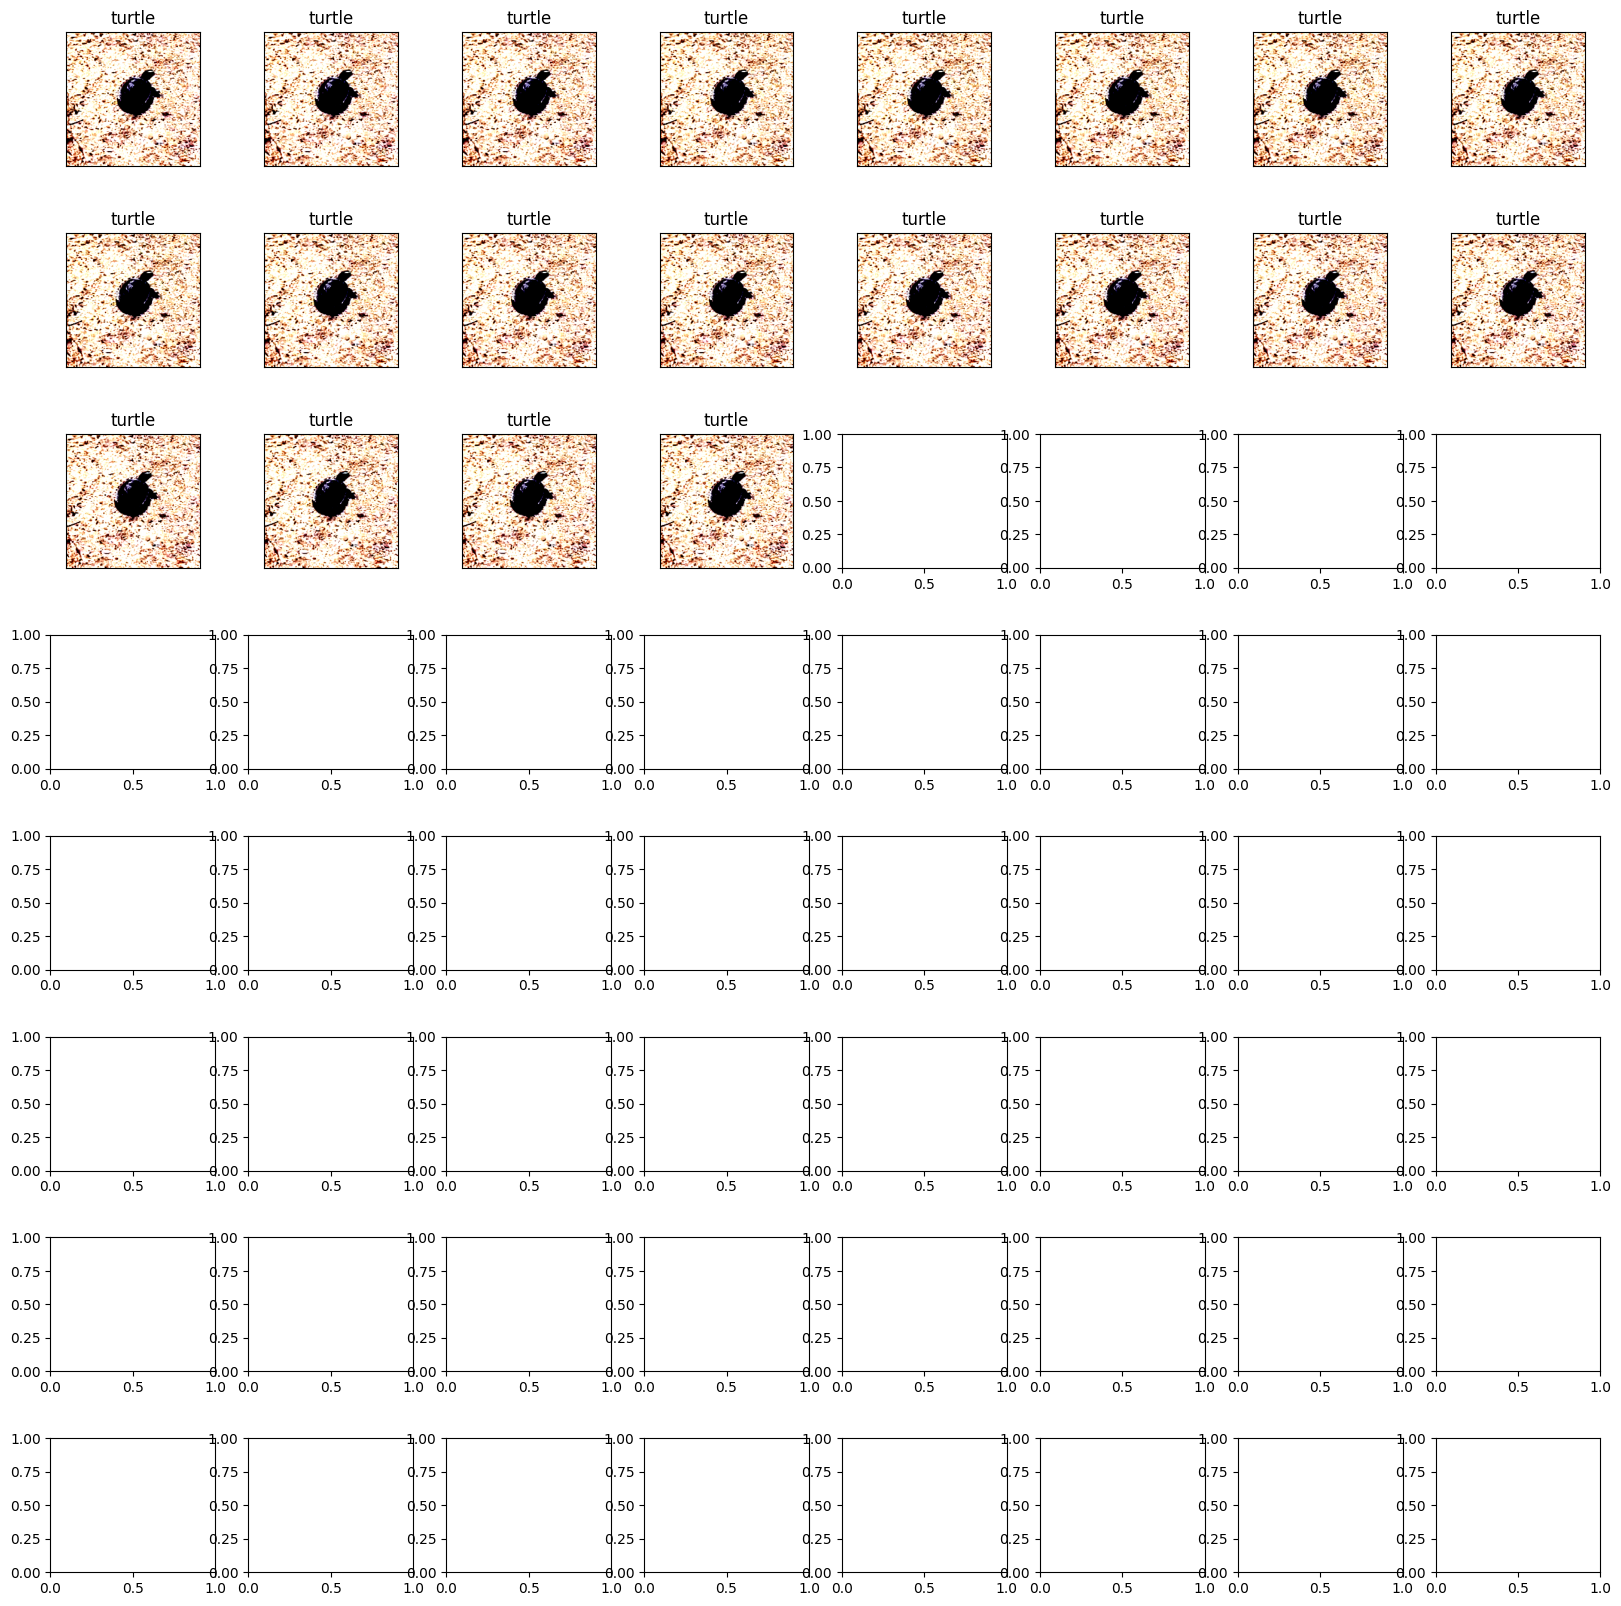

In [2]:
vl.dataset.visualize_batch()